In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kbgen.config import rootdir
import os
sns.set()
datadir = os.path.join(rootdir, 'data/homedepot')

In [2]:
df = pd.read_csv(os.path.join(datadir, 'attributes.csv'))
df = df[df.value.notnull()]

In [3]:
df.head() 

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


### Understanding the data

In [4]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("Number of unique product_uid (entities): ", df.product_uid.nunique())
print("Number of unique property names: ", df.name.nunique())

Number of rows:  2042519
Number of columns:  3
Number of unique product_uid (entities):  86263
Number of unique property names:  5409


In [5]:
property_counts = df.name.value_counts()
prop_gt_10 = property_counts.index[property_counts > 10].tolist()
len(prop_gt_10)

4058

In [6]:
common_properties = df["name"].value_counts(sort=True)[:20]
df_small = df[df.name.isin(common_properties.index)]

In [7]:
df_small.name.unique()

array(['Bullet01', 'Bullet02', 'Bullet03', 'Bullet04', 'Bullet05',
       'Bullet06', 'Bullet07', 'Material', 'MFG Brand Name',
       'Product Depth (in.)', 'Product Height (in.)',
       'Product Weight (lb.)', 'Product Width (in.)',
       'Assembled Height (in.)', 'Assembled Width (in.)', 'Bullet08',
       'Color Family', 'Color/Finish', 'Certifications and Listings',
       'Bullet09'], dtype=object)

In [8]:
def summarize(df):
    print("Number of rows: ", df.shape[0])
    print("Number of columns: ", df.shape[1])
    print("Number of unique product_uid (entities): ", df.product_uid.nunique())
    print("Number of unique property names: ", df.name.nunique())
summarize(df_small)

Number of rows:  995116
Number of columns:  3
Number of unique product_uid (entities):  86263
Number of unique property names:  20


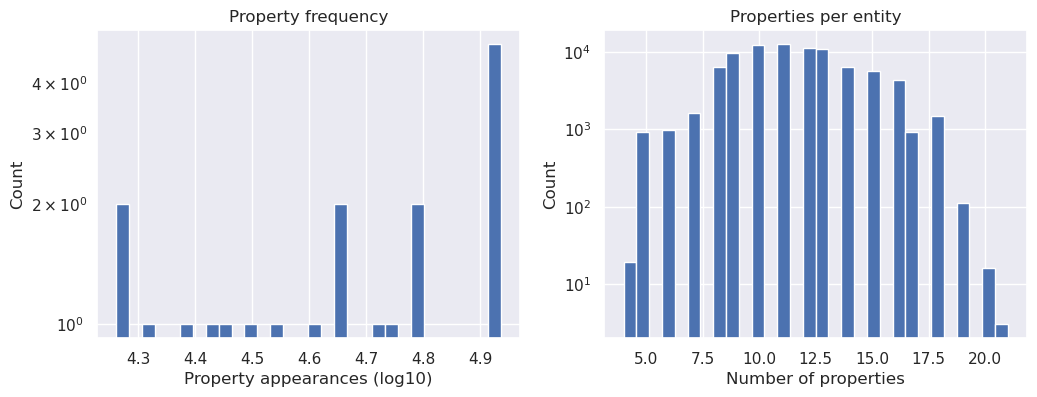

In [9]:
def hist_properties(df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    df.groupby('name').count().product_uid.apply(np.log10).hist(bins=30, ax=axes[0], log=True)
    axes[0].set_xlabel('Property appearances (log10)'), axes[0].set_ylabel('Count'), axes[0].set_title('Property frequency')
    df.groupby('product_uid').count().name.hist(bins=30, ax=axes[1], log=True)
    axes[1].set_xlabel('Number of properties'), axes[1].set_ylabel('Count'), axes[1].set_title('Properties per entity')
    
hist_properties(df_small)

## Schema construction

In [10]:
(df_small[["name", "value"]].groupby('name').first().to_json())

'{"value":{"Assembled Height (in.)":"7.76 in","Assembled Width (in.)":"6.63 in","Bullet01":"Versatile connector for various 90\\u00b0 connections and home repair projects","Bullet02":"Stronger than angled nailing or screw fastening alone","Bullet03":"Help ensure joints are consistently straight and strong","Bullet04":"Dimensions: 3 in. x 3 in. x 1-1\\/2 in.","Bullet05":"Made from 12-Gauge steel","Bullet06":"Galvanized for extra corrosion resistance","Bullet07":"Install with 10d common nails or #9 x 1-1\\/2 in. Strong-Drive SD screws","Bullet08":"Actual paint colors may vary from on-screen and printer representations","Bullet09":"Recessed turntable\'s on\\/off feature is especially helpful when cooking with plates that are larger than the turntable","Certifications and Listings":"ANSI Certified,ASTM Compliant,CSA Certified","Color Family":"Browns \\/ Tans","Color\\/Finish":"Tugboat","MFG Brand Name":"Simpson Strong-Tie","Material":"Galvanized Steel","Product Depth (in.)":"1.5","Product 

In [11]:
df[df.name == "Product Depth (in.)"].value.str.strip("in").astype(float)

11          1.500000
101        64.960000
126        15.280000
170        18.500000
206         2.750000
             ...    
2044526    13.625000
2044557    81.000000
2044576     8.250000
2044593    13.600000
2044609     1.496064
Name: value, Length: 53652, dtype: float64

In [12]:
df[df.name == "Color Family"].value.value_counts()


White         6546
Black         3115
Brown         2339
Gray          1892
Whites        1829
              ... 
Camouflage       2
Ash              2
Pine             1
Semi-Clear       1
Rosewood         1
Name: value, Length: 94, dtype: int64

In [13]:
name_conversion = {
"Assembled Height (in.)": "assembled.height",
"Assembled Width (in.)": "assembled.width",
"Bullet01": "bullet.01",
"Bullet02": "bullet.02",
"Bullet03": "bullet.03",
"Bullet04": "bullet.04",
"Bullet05": "bullet.05",
"Bullet06": "bullet.06",
"Bullet07": "bullet.07",
"Bullet08": "bullet.08",
"Bullet09": "bullet.09",
"Certifications and Listings": "certifications",
"Color Family": "color.family",
"Color/Finish": "color.finish",
"MFG Brand Name": "brand_name",
"Material": "material",
"Product Depth (in.)": "product.depth",
"Product Height (in.)": "product.height",
"Product Weight (lb.)": "product.weight",
"Product Width (in.)": "product.width"
}

schema = {
"assembled.height": 0,
"assembled.width": 0,
"bullet.01": 2,
"bullet.02": 2,
"bullet.03": 2,
"bullet.04": 2,
"bullet.05": 2,
"bullet.06": 2,
"bullet.07": 2,
"bullet.08": 2,
"bullet.09": 2,
"certifications": 1,
"color.family": 1,
"color.finish": 2,
"brand_name": 1,
"material": 1,
"product.depth": 0,
"product.height": 0,
"product.weight": 0,
"product.width": 0
}

import json
# save to json
json.dump(schema, open(os.path.join(datadir, "hd_schema.json"), "w"))
json.loads(open(os.path.join(datadir, "hd_schema.json")).read())

{'assembled.height': 0,
 'assembled.width': 0,
 'bullet.01': 2,
 'bullet.02': 2,
 'bullet.03': 2,
 'bullet.04': 2,
 'bullet.05': 2,
 'bullet.06': 2,
 'bullet.07': 2,
 'bullet.08': 2,
 'bullet.09': 2,
 'certifications': 1,
 'color.family': 1,
 'color.finish': 2,
 'brand_name': 1,
 'material': 1,
 'product.depth': 0,
 'product.height': 0,
 'product.weight': 0,
 'product.width': 0}

In [14]:
df_ = {}
for product_uid, property_name, property_value in df_small[["product_uid", "name", "value"]].itertuples(index=False):
    df_[product_uid] = df_.get(product_uid, {})
    df_[product_uid][property_name] = df_[product_uid].get(property_name, [])
    df_[product_uid][property_name] = property_value
    
df_ = pd.DataFrame.from_dict(df_, orient='index')
# rename columns
df_.rename(columns=name_conversion, inplace=True)

# check that the schema works
def to_float(x):
    if "/" in x:
        x = x.split("/")
        return float(x[0]) / float(x[1])
    elif "E" in x:
        return float("nan")
        # x = x.split("E")
        # power =  float(x[1]) if x[1] != "" else 0
        # return float(x[0]) * 10**power
    else:
        try:
            return float(x)
        except Exception as e:
            # print(f"Problem in {x}", e)
            return float("nan")

for name in df_.columns:
    value_list = df_[name]
    if schema[name] == 0:
            clean = value_list.str.strip("in").str.strip("lb")
            # Float is not iterable
            clean = clean.str.split("-").apply(lambda x: x if isinstance(x, float) else sum([to_float(y) for y in x]))
            # clean is a series of strings? because split works so it should return
            # that's also my guess. but it should be list of str
            # only keep 99 percentile and replace the rest with nan
            clean[clean > clean.quantile(.99)] = float("nan")
            df_[name] = clean
    elif schema[name] == 1:
        clean = value_list.str.lower().str.strip()
        df_[name] = clean
        print(name, clean.value_counts().__len__())
        # PLOTTING
        # clean.value_counts().apply(np.log10).hist(log=True)
        # update xticks
        # ticks = plt.xticks()[0]
        # plt.xticks(ticks, [int(10**x) for x in ticks])
        # plt.show()
    elif schema[name] == 2:
        continue
    
df_["product_uid"] = df_.index.astype(int)
df_.reset_index(drop=True, inplace=True)


material 663
brand_name 4274
color.family 93
certifications 308


In [15]:
df_.describe()

,product.depth,product.height,product.weight,product.width,assembled.height,assembled.width,product_uid
count,53119.000000,54157.000000,44721.000000,60526.000000,18117.000000,18084.000000,86263.000000
mean,11.290226,16.406818,34.694944,15.053647,25.699783,25.948753,171411.279123
std,15.934366,20.294587,67.767933,19.074647,27.636775,30.885891,36212.844598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100001.000000
25%,1.900000,3.500000,1.000000,3.350000,3.750000,4.000000,142366.000000
50%,5.500000,8.000000,6.400000,8.000000,15.000000,17.500000,178281.000000
75%,15.000000,20.500000,35.680000,19.100000,36.000000,36.000000,201385.500000
max,132.000000,105.000000,585.000000,138.250000,126.000000,228.000000,224428.000000


array([[<Axes: title={'center': 'assembled.height'}>,
        <Axes: title={'center': 'assembled.width'}>],
       [<Axes: title={'center': 'product.depth'}>,
        <Axes: title={'center': 'product.height'}>],
       [<Axes: title={'center': 'product.weight'}>,
        <Axes: title={'center': 'product.width'}>]], dtype=object)

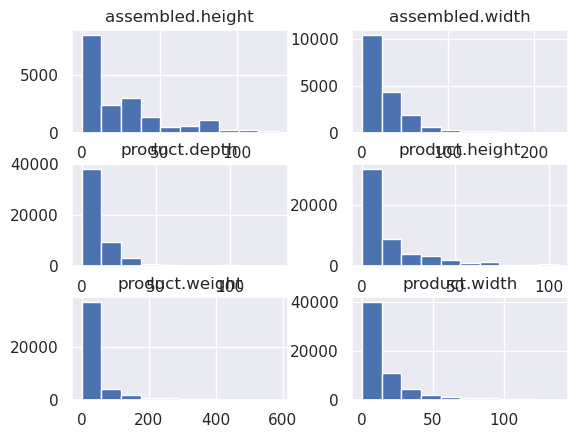

In [16]:
numerical_columns = ["assembled.height", "assembled.width", "product.depth", "product.height", "product.weight", "product.width"]
df_.loc[:, numerical_columns].hist()

# Setting up Ranking dataset (includes queries)

In [17]:
df_relevance = pd.read_csv(os.path.join(datadir, "train.csv"), encoding="ISO-8859-1")

In [18]:
df_relevance = df_relevance[df_relevance.relevance > 2]
df_relevance

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
...,...,...,...,...,...
74061,221455,206637,Schluter Rondec Stainless Steel 3/8 in. x 1 in...,rondec stainless steel 3/8 edge protection,3.00
74063,221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
74064,221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33
74065,221471,206648,Plastec 11 in. x 24 in. Rose Garden Wall Decor...,zen garden decor,3.00


In [19]:
df_relevance.nunique()

id               50428
product_uid      40168
product_title    39436
search_term      11062
relevance            6
dtype: int64

In [20]:
grouped = df_relevance.groupby("product_uid").agg(list)
grouped

,id,product_title,search_term,relevance
product_uid,,,,
100001,"[2, 3]","[Simpson Strong-Tie 12-Gauge Angle, Simpson St...","[angle bracket, l bracket]","[3.0, 2.5]"
100002,[9],[BEHR Premium Textured DeckOver 1-gal. #SC-141...,[deck over],[3.0]
100005,"[16, 17]",[Delta Vero 1-Handle Shower Only Faucet Trim K...,"[rain shower head, shower only faucet]","[2.33, 2.67]"
100006,"[18, 20, 21]",[Whirlpool 1.9 cu. ft. Over the Range Convecti...,"[convection otr, microwave over stove, microwa...","[3.0, 2.67, 3.0]"
100007,[23],[Lithonia Lighting Quantum 2-Light Black LED E...,[emergency light],[2.67]
...,...,...,...,...
206637,[221455],[Schluter Rondec Stainless Steel 3/8 in. x 1 i...,[rondec stainless steel 3/8 edge protection],[3.0]
206639,[221458],[Philips 40-Watt Halogen R20 Flood Light Bulb ...,[r20 halogen light],[3.0]
206641,[221463],[Schlage Camelot In-Active Aged Bronze Handles...,[schlage lock siena half dummy knob with],[2.33]


In [21]:
grouped[grouped["product_title"].apply(len) > 1]["product_title"].iloc[0]

['Simpson Strong-Tie 12-Gauge Angle', 'Simpson Strong-Tie 12-Gauge Angle']

In [22]:
# deal with set type for multiple product titles or search terms
# two additional properties in the schema
# "product_title": 2,
# "search_term": 2, 
# add to df_ and save to csv
# df_.head()
# select the entry that has the highest relevance score
query_max_relevance = df_relevance.sort_values("relevance", ascending=False).groupby("product_uid").first()

In [23]:
query_max_relevance

,id,product_title,search_term,relevance
product_uid,,,,
100001,2,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
100002,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
100005,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
100006,21,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00
100007,23,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67
...,...,...,...,...
206637,221455,Schluter Rondec Stainless Steel 3/8 in. x 1 in...,rondec stainless steel 3/8 edge protection,3.00
206639,221458,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
206641,221463,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33


In [24]:
df_final = df_.merge(query_max_relevance[["product_title", "search_term", "relevance"]], left_on="product_uid", right_index=True, how="left")
# combine columns with the word "bullet" and seperate by \n replace nan with empty string
df_final["bullet"] = df_final["bullet.01"].fillna("") + "\n" + df_final["bullet.02"].fillna("") + "\n" + df_final["bullet.03"].fillna("") + "\n" + df_final["bullet.04"].fillna("") + "\n" + df_final["bullet.05"].fillna("") + "\n" + df_final["bullet.06"].fillna("") + "\n" + df_final["bullet.07"].fillna("") + "\n" + df_final["bullet.08"].fillna("") + "\n" + df_final["bullet.09"].fillna("")
df_final.drop(columns=["product_uid", "bullet.01", "bullet.02", "bullet.03", "bullet.04", "bullet.05", "bullet.06", "bullet.07", "bullet.08", "bullet.09"], inplace=True)
df_final.head()


,material,brand_name,product.depth,product.height,product.weight,product.width,assembled.height,assembled.width,color.family,color.finish,certifications,product_title,search_term,relevance,bullet
0,galvanized steel,simpson strong-tie,1.50,3.00,0.26,3.00,NaN,NaN,NaN,NaN,NaN,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90° connection...
1,NaN,behr premium textured deckover,NaN,NaN,NaN,NaN,7.76,6.63,browns / tans,Tugboat,NaN,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Revives wood and composite decks, railings, po..."
2,composite,sterling,NaN,NaN,129.00,NaN,NaN,NaN,white,White,"ansi certified,astm compliant,csa certified",NaN,NaN,NaN,Slightly narrower for tighter spaces\nDesigned...
3,NaN,grape solar,64.96,1.57,NaN,39.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive power tolerance (0 to +5-Watt)\nAnti-...
4,NaN,delta,15.28,24.00,NaN,7.09,NaN,NaN,chrome,Chrome,"ada compliant,csa certified,iapmo certified",Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,"Includes the trim kit only, the rough-in kit (..."


In [25]:
# save df to csv
df_final.to_csv(os.path.join(datadir, "homedepot.csv"), index=False)
# read with same index
df_final = pd.read_csv(os.path.join(datadir, "homedepot.csv"))

In [26]:
df_final

,material,brand_name,product.depth,product.height,product.weight,product.width,assembled.height,assembled.width,color.family,color.finish,certifications,product_title,search_term,relevance,bullet
0,galvanized steel,simpson strong-tie,1.50,3.0000,0.26,3.00,NaN,NaN,NaN,NaN,NaN,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,Versatile connector for various 90° connection...
1,NaN,behr premium textured deckover,NaN,NaN,NaN,NaN,7.76,6.63,browns / tans,Tugboat,NaN,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,"Revives wood and composite decks, railings, po..."
2,composite,sterling,NaN,NaN,129.00,NaN,NaN,NaN,white,White,"ansi certified,astm compliant,csa certified",NaN,NaN,NaN,Slightly narrower for tighter spaces\nDesigned...
3,NaN,grape solar,64.96,1.5700,NaN,39.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive power tolerance (0 to +5-Watt)\nAnti-...
4,NaN,delta,15.28,24.0000,NaN,7.09,NaN,NaN,chrome,Chrome,"ada compliant,csa certified,iapmo certified",Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,"Includes the trim kit only, the rough-in kit (..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86258,NaN,whitehall products,0.25,7.5000,NaN,4.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nImportant: personalization form must be comp...
86259,NaN,unbranded,NaN,0.3125,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nUse for wrapping odd shaped items\nPlastic c...
86260,steel,clopay,NaN,84.0000,NaN,1.38,NaN,NaN,tan,NaN,NaN,NaN,NaN,NaN,\nOffers a 3-layer construction (steel-insulat...
86261,steel,clopay,96.00,84.0000,NaN,2.00,NaN,NaN,brown,NaN,NaN,NaN,NaN,NaN,\nOffers a 3-layer construction (steel-insulat...


In [27]:
schema_final = {
    "bullet": 2,
    "assembled.height": 0,
    "assembled.width": 0,
    "certifications": 1,
    "color.family": 1,
    "color.finish": 2,
    "brand_name": 1,
    "material": 1,
    "product.depth": 0,
    "product.height": 0,
    "product.weight": 0,
    "product.width": 0,
    "product_title": 2,
    "search_term": 2,
    "relevance": 0
}

json.dump(schema_final, open(os.path.join(datadir, "homedepot_schema.json"), "w"))
json.loads(open(os.path.join(datadir, "homedepot_schema.json")).read())

{'bullet': 2,
 'assembled.height': 0,
 'assembled.width': 0,
 'certifications': 1,
 'color.family': 1,
 'color.finish': 2,
 'brand_name': 1,
 'material': 1,
 'product.depth': 0,
 'product.height': 0,
 'product.weight': 0,
 'product.width': 0,
 'product_title': 2,
 'search_term': 2,
 'relevance': 0}

# Testing the random baseline

In [28]:
from kbgen.data.datasets import HomeDepot
from kbgen.config import defaults_customLM as config
config["qt_transform"] = True
dataset = HomeDepot.from_config(config)

TypeError: object.__init__() takes exactly one argument (the instance to initialize)

(array([2.3668e+04, 3.5980e+03, 2.1850e+03, 1.4020e+03, 1.0920e+03,
        7.1700e+02, 6.5300e+02, 4.4800e+02, 3.1500e+02, 2.4900e+02,
        2.1900e+02, 1.9800e+02, 2.7500e+02, 1.0300e+02, 1.0800e+02,
        8.7000e+01, 6.1000e+01, 8.5000e+01, 6.6000e+01, 1.8000e+01,
        3.6000e+01, 1.9000e+01, 3.4000e+01, 1.8000e+01, 2.5000e+01,
        2.9000e+01, 2.2000e+01, 1.2000e+01, 1.9000e+01, 1.9000e+01]),
 array([1.        , 1.0333333 , 1.06666672, 1.10000002, 1.13333333,
        1.16666663, 1.20000005, 1.23333335, 1.26666665, 1.29999995,
        1.33333337, 1.36666667, 1.39999998, 1.43333328, 1.4666667 ,
        1.5       , 1.5333333 , 1.56666672, 1.60000002, 1.63333333,
        1.66666663, 1.70000005, 1.73333335, 1.76666665, 1.79999995,
        1.83333337, 1.86666667, 1.89999998, 1.93333328, 1.9666667 ,
        2.        ]),
 <BarContainer object of 30 artists>)

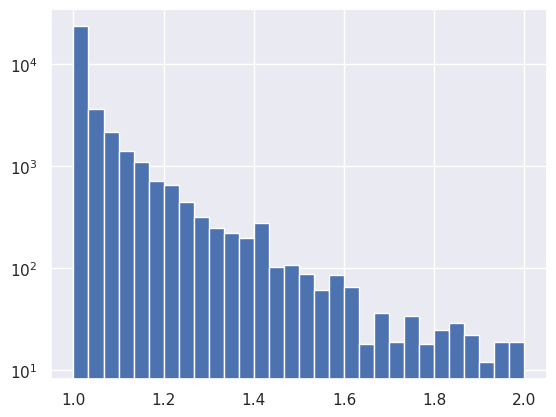

In [ ]:
arr = dataset.train["product.weight"]
arr = arr[arr!=-1000] 
plt.hist(arr.cpu().numpy(), bins=30, log=True)